# Ejercicios AA1

## 1. Entorno de desarrollo y librerías básicas.

### 1.1 Librería Pandas

In [59]:
import pandas as pd

# Leer el archivo anterior y mostrar el número de elementos que posee, el número de columnas y sus nombres
df = pd.read_csv('parte1/data/coches.csv')

print(f'Número de elementos: {df.size}')
print(f'Número de columnas: {df.shape[1]}')
print(f'Nombres de las columnas: {df.columns.tolist()}')

# Mostrar de las 5 primeras filas solo la marca y el modelo
print(df[['marca', 'modelo']].head())

# Obtener cuantas marcas diferentes y cuáles son
print(f'Número de marcas diferentes: {df.marca.nunique()}')
print(f'Marcas diferentes: {df.marca.unique()}')

# Mostrar los coches de la marca Opel
print(df[df.marca == 'Opel'])

# Calcular los km promedio de cada marca
print(df.groupby('marca').kms.mean())

# Sumar 1000 euros al precio de los coches de año posterior a 2015
df.loc[df.año > 2015, 'precio'] += 1000
print(df.loc[df.año > 2015])

Número de elementos: 30
Número de columnas: 6
Nombres de las columnas: ['matrícula', 'marca', 'modelo', 'año', 'kms', 'precio']
       marca  modelo
0     Toyota   Camry
1      Honda  Accord
2       Ford  Fusion
3  Chevrolet  Malibu
4     Nissan  Altima
Número de marcas diferentes: 5
Marcas diferentes: ['Toyota' 'Honda' 'Ford' 'Chevrolet' 'Nissan']
Empty DataFrame
Columns: [matrícula, marca, modelo, año, kms, precio]
Index: []
marca
Chevrolet    34987.0
Ford         22456.0
Honda        30278.0
Nissan       38163.0
Toyota       25153.0
Name: kms, dtype: float64
  matrícula      marca  modelo   año    kms  precio
0    ABC123     Toyota   Camry  2019  25153    6300
1    XYZ456      Honda  Accord  2018  30278   10000
2    DEF789       Ford  Fusion  2020  22456    5000
3    GHI012  Chevrolet  Malibu  2017  34987    8500
4    JKL345     Nissan  Altima  2016  38163    4200


### 1.2 Librería Numpy

In [60]:
import numpy as np
# Crear un vector de tamaño 10 de ceros excepto el quinto elemento que será 1.
v = np.zeros(10)
v[4] = 1
print(v)

print("--------------------")

# Crear un vector con valores entre 10 y 49.
v = np.random.randint(10,49, size=(1,10))
print(v)

print("--------------------")


# Crear una matriz de 3x3 con valores entre 0 y 8.
v = np.random.randint(0,8, size=(3,3))
print(v)

print("--------------------")

# Crear una matriz identidad de dimensiones 4x4.
v = np.eye(4)
print(v)

print("--------------------")

# Crear un array de dimensiones 3x3x3 con valores aleatorios.
v = np.random.random((3,3,3))
print(v)

print("--------------------")

# Crear una matriz de 5x5 con 1 en los bordes y 0 en el interior.
v = np.ones((5,5))
v[1:-1,1:-1] = 0
print(v)

print("--------------------")

# Crear un vector de tamaño 10 con valores aleatorios y modificar el valor máximo por 0.
v = np.random.random(10)
v[v == v.max()] = 0
print(v)

print("--------------------")

# ¿Cómo encontrar el valor más próximo a un escalar dado, en un vector?
v = np.random.randint(0, 25, size=(1,10))
print(v)
escalar = 1
v2 = np.abs(v - escalar)
print(f"El valor más cercano a {escalar} es {v.argmin()} y se encuentra en la posición {v.min()}")

print("--------------------")

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
--------------------
[[38 48 13 40 11 22 40 15 11 43]]
--------------------
[[1 4 6]
 [6 4 3]
 [4 3 1]]
--------------------
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
--------------------
[[[0.23979587 0.37029607 0.11916815]
  [0.71228928 0.42144608 0.22822206]
  [0.07917878 0.95092874 0.06426453]]

 [[0.04038174 0.63070127 0.78080605]
  [0.40660452 0.3565501  0.72825814]
  [0.17730502 0.06260703 0.72053325]]

 [[0.95249912 0.83041673 0.70334455]
  [0.41743256 0.07049084 0.30415275]
  [0.68387939 0.65299816 0.63949297]]]
--------------------
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]
--------------------
[0.65150465 0.41155247 0.15308502 0.09031613 0.         0.3111903
 0.7217978  0.45045996 0.40163467 0.05943183]
--------------------
[[14 16 17  5 17 22 10 17 19 19]]
El valor más cercano a 1 es 3 y se encuentra en la posición 5
--------------------


## 2 Preprocesado básico de datos

### Ejercicios propuestos

In [61]:
# Utilizando los datos del archivo iris-perdidos.csv, sustituir para cada variable 
# los valores perdidos por el promedio de los valores de dicha variable.

df = pd.read_csv('parte1/data/iris-perdidos.csv', sep = ',')

for col in df.columns[:-1]:
    df[col].fillna(df[col].mean())

print(df)

# Implementar una función que acepte un array unidimensional y dos valores reales,
# minimo y maximo, y realice el escalado del array entre los valores minimo y
# maximo.

def escalar(arr, minimo, maximo):
    return (arr - arr.min()) / (arr.max() - arr.min()) * (maximo - minimo)

print(escalar(np.array([1,2,3,4,5]), 0, 1))

# Implementar una clase en Python que permita convertir valores simbólicos a nu-
# méricos. La clase además del constructor debe poseer los métodos convertir,
# convertir_inversa. El primer método admite un array con valores simbólicos
# y devuelve otro array con los valores numéricos. El segundo método debe tomar
#como entrada un array que previamente fue convertido a numérico y devolver el
# correspondiente con valores simbólicos.

class Convertidor:
    def __init__(self):
        self.mapa = {}
        self.contador = 0

    def convertir(self, arr):
        for i in arr:
            if i not in self.mapa:
                self.mapa[i] = self.contador
                self.contador += 1
        return np.array([self.mapa[i] for i in arr])

    def convertir_inversa(self, arr):
        return np.array([list(self.mapa.keys())[list(self.mapa.values()).index(i)] for i in arr])
    
c = Convertidor()
arr = np.array(['a', 'b', 'c', 'a', 'b', 'c'])
arr_num = c.convertir(arr)
print(arr_num)
arr_simb = c.convertir_inversa(arr_num)
print(arr_simb)

     sepal length  sepal width  petal length  petal width           class
0             NaN          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
[0.   0.25 0.5  0.75 1.  ]
[0 1 2 0 1 2]
['a' 'b' 'c' 'a' 'b' 'c']


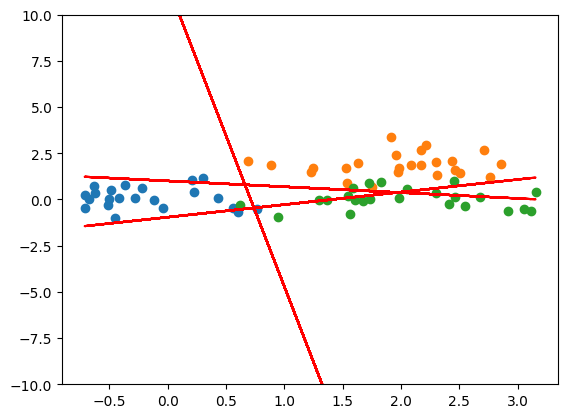

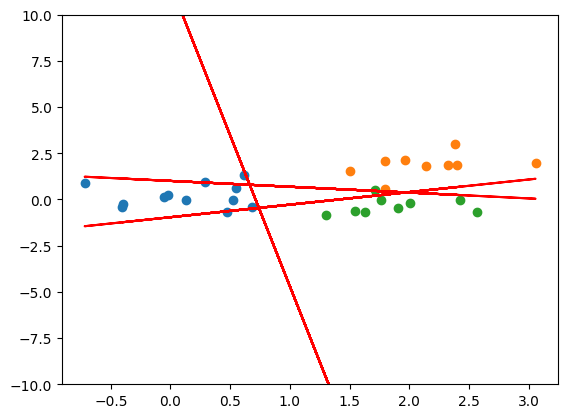

0.9333333333333333


In [68]:
# Ejercico 6

# Generar un conjunto de datos sintéticos con 100 muestras utilizando la función
# make_blobs con dos características y tres clases. Las clases estarán centradas en
# el espacio de características en ((0,0), (2,2), (2,0])) y desviación estándar para los
# clusters igual a 0.6

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=[(0,0), (2,2), (2,0)], cluster_std=0.6, random_state=567)


n_clases=3

# Dividir el conjunto de datos en 70 % de las muestras para entrenamiento y el resto
# para test usando como semilla el valor 567; y obtener el clasificador mediante el
# método Perceptrón.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=567)
clf = Perceptron()
clf.fit(X_train, y_train)

# Dibujar las muestras de entrenamiento y las superficies de decisión.

for clase in range(n_clases):
    m = -clf.coef_[clase][0] / clf.coef_[clase][1]
    n = -clf.intercept_[clase] / clf.coef_[clase][1]
    recta = X_train[:,0] * m + n
    puntos_clase = y_train == clase
    plt.scatter(X_train[puntos_clase,0], X_train[puntos_clase, 1])
    plt.plot(X_train[:,0], recta, 'r')
plt.ylim(-10, 10)
plt.show()

# Dibujar las muestras de test y las superficies de decisión.

for clase in range(n_clases):
    m = -clf.coef_[clase][0] / clf.coef_[clase][1]
    n = -clf.intercept_[clase] / clf.coef_[clase][1]
    recta = X_test[:,0] * m + n
    puntos_clase = y_test == clase
    plt.scatter(X_test[puntos_clase,0], X_test[puntos_clase, 1])
    plt.plot(X_test[:,0], recta, 'r')
plt.ylim(-10, 10)
plt.show()

# Obtener la exactitud del clasificador en el conjunto de test y analizar el resultado de
# acuerdo a la gráfica del apartado anterior.

from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [76]:
# Leer el conjunto de entrenamiento y de test de los archivos CelebA-1K-train.csv
# y CelebA-1K-test.csv respectivamente

train = pd.read_csv('datos_p5/CelebA-1K-train.csv')
train = train.drop(columns=['Image_name'])
train = train.drop(columns=['Gender'])
test = pd.read_csv('datos_p5/CelebA-1K-test.csv')
test = test.drop(columns=['Image_name'])
test = test.drop(columns=['Gender'])

# Entrenar un clasificador biclásico utilizando el método Perceptrón y obtener la tasa
# de acierto del clasificador en las muestras del conjunto de test (utilizar la función
# accuracy_score y en el conjunto de train.

clf = Perceptron()
clf.fit(train.iloc[:,:-1], train.iloc[:,-1])
y_pred = clf.predict(test.iloc[:,:-1])
print(accuracy_score(test.iloc[:,-1], y_pred))

ValueError: Unknown label type: (array([-2.20039582e+00, -1.84014952e+00, -1.78365088e+00, -1.60284519e+00,
       -1.57080877e+00, -1.47542048e+00, -1.46206558e+00, -1.46037567e+00,
       -1.28750622e+00, -1.25714135e+00, -1.18089724e+00, -1.16996408e+00,
       -1.06055653e+00, -1.03276265e+00, -9.43251073e-01, -8.80722046e-01,
       -8.45072865e-01, -8.40082407e-01, -8.13661516e-01, -7.57452309e-01,
       -7.46874571e-01, -6.89777792e-01, -6.29536092e-01, -5.90724409e-01,
       -5.72704732e-01, -5.50415039e-01, -5.47970831e-01, -5.40553629e-01,
       -5.30597985e-01, -5.27721107e-01, -5.23027122e-01, -5.21326423e-01,
       -5.20550251e-01, -5.14211416e-01, -4.79239523e-01, -4.72755194e-01,
       -4.68105704e-01, -4.65438366e-01, -4.54136640e-01, -4.52771366e-01,
       -4.50090349e-01, -4.40151632e-01, -4.39213425e-01, -4.37842578e-01,
       -4.33077991e-01, -4.25133467e-01, -4.21549380e-01, -4.17711377e-01,
       -4.11884189e-01, -4.11096871e-01, -4.10882086e-01, -4.09008265e-01,
       -4.07043099e-01, -4.05515820e-01, -4.02815372e-01, -3.96935701e-01,
       -3.95875663e-01, -3.95674974e-01, -3.93018335e-01, -3.91061187e-01,
       -3.83417398e-01, -3.80856276e-01, -3.80667239e-01, -3.80196422e-01,
       -3.77344728e-01, -3.76659364e-01, -3.74882877e-01, -3.74781191e-01,
       -3.74726504e-01, -3.66789848e-01, -3.63055080e-01, -3.60045403e-01,
       -3.59961987e-01, -3.59632820e-01, -3.59214842e-01, -3.58840853e-01,
       -3.56966704e-01, -3.55671942e-01, -3.54333013e-01, -3.48745644e-01,
       -3.47084194e-01, -3.46780747e-01, -3.43734801e-01, -3.41960758e-01,
       -3.38837028e-01, -3.35672349e-01, -3.34271044e-01, -3.32521439e-01,
       -3.31505507e-01, -3.28543186e-01, -3.28300804e-01, -3.28228712e-01,
       -3.24639678e-01, -3.23902488e-01, -3.23781639e-01, -3.22937906e-01,
       -3.22920769e-01, -3.20621312e-01, -3.18526357e-01, -3.17828357e-01,
       -3.16914678e-01, -3.16645116e-01, -3.16057980e-01, -3.15876812e-01,
       -3.13413918e-01, -3.13227683e-01, -3.11965048e-01, -3.10941100e-01,
       -3.10040385e-01, -3.09630722e-01, -3.07687253e-01, -3.05835634e-01,
       -3.05797040e-01, -3.05711150e-01, -3.01433653e-01, -3.00898701e-01,
       -3.00817192e-01, -3.00687015e-01, -2.99965918e-01, -2.98790365e-01,
       -2.98094064e-01, -2.97477633e-01, -2.97267973e-01, -2.96504498e-01,
       -2.94502378e-01, -2.93204755e-01, -2.88897365e-01, -2.87560940e-01,
       -2.86611199e-01, -2.86217511e-01, -2.85513610e-01, -2.84289300e-01,
       -2.83250630e-01, -2.83193558e-01, -2.82767802e-01, -2.81990409e-01,
       -2.81312019e-01, -2.80649632e-01, -2.80029207e-01, -2.76909590e-01,
       -2.75109202e-01, -2.73148090e-01, -2.72722453e-01, -2.72217304e-01,
       -2.72155017e-01, -2.71906585e-01, -2.70513773e-01, -2.69625008e-01,
       -2.65763462e-01, -2.59094983e-01, -2.58797944e-01, -2.56261915e-01,
       -2.56184042e-01, -2.56047904e-01, -2.55881488e-01, -2.54645199e-01,
       -2.54609495e-01, -2.53919214e-01, -2.53632993e-01, -2.53243059e-01,
       -2.52636433e-01, -2.51806527e-01, -2.50875026e-01, -2.50821084e-01,
       -2.49579489e-01, -2.48433977e-01, -2.46146515e-01, -2.45250970e-01,
       -2.44127244e-01, -2.43730679e-01, -2.42918581e-01, -2.41865203e-01,
       -2.41796821e-01, -2.41493821e-01, -2.39157945e-01, -2.38455430e-01,
       -2.38373786e-01, -2.38235667e-01, -2.37941965e-01, -2.37263575e-01,
       -2.37049863e-01, -2.35154986e-01, -2.34840512e-01, -2.34733507e-01,
       -2.34584033e-01, -2.33872056e-01, -2.32476830e-01, -2.31558979e-01,
       -2.31449649e-01, -2.30384931e-01, -2.26739183e-01, -2.25075230e-01,
       -2.24849507e-01, -2.24799678e-01, -2.22900957e-01, -2.22551316e-01,
       -2.21795574e-01, -2.21276850e-01, -2.20685825e-01, -2.17579111e-01,
       -2.17502549e-01, -2.16117859e-01, -2.15842515e-01, -2.14576140e-01,
       -2.14364797e-01, -2.14344457e-01, -2.12657318e-01, -2.12535948e-01,
       -2.11182877e-01, -2.08880708e-01, -2.08690405e-01, -2.08539054e-01,
       -2.08266124e-01, -2.08242685e-01, -2.08112389e-01, -2.07656801e-01,
       -2.07629979e-01, -2.07586959e-01, -2.07537770e-01, -2.07093805e-01,
       -2.06087068e-01, -2.04413325e-01, -2.02700585e-01, -2.00569361e-01,
       -2.00284973e-01, -1.98738858e-01, -1.97835684e-01, -1.97076604e-01,
       -1.96582615e-01, -1.95538431e-01, -1.95172131e-01, -1.93763331e-01,
       -1.93286449e-01, -1.92960232e-01, -1.92895100e-01, -1.92785218e-01,
       -1.90384105e-01, -1.90122843e-01, -1.89331532e-01, -1.89290687e-01,
       -1.87452421e-01, -1.86319605e-01, -1.85937330e-01, -1.85412347e-01,
       -1.85269594e-01, -1.83654085e-01, -1.83421940e-01, -1.83408171e-01,
       -1.83142856e-01, -1.82848781e-01, -1.82533830e-01, -1.81565553e-01,
       -1.81449935e-01, -1.80879325e-01, -1.80534214e-01, -1.80165395e-01,
       -1.79250106e-01, -1.78955033e-01, -1.78348869e-01, -1.78313658e-01,
       -1.78259745e-01, -1.77002773e-01, -1.76628858e-01, -1.75602898e-01,
       -1.75418943e-01, -1.75061584e-01, -1.74884453e-01, -1.74743891e-01,
       -1.73869595e-01, -1.72544375e-01, -1.72379568e-01, -1.71806946e-01,
       -1.70449317e-01, -1.70176700e-01, -1.68461040e-01, -1.67929918e-01,
       -1.67708591e-01, -1.67258680e-01, -1.67033851e-01, -1.66824698e-01,
       -1.66660041e-01, -1.66082487e-01, -1.65655509e-01, -1.65239021e-01,
       -1.65120512e-01, -1.64539725e-01, -1.64074153e-01, -1.63203239e-01,
       -1.63122162e-01, -1.63112298e-01, -1.62900791e-01, -1.62340641e-01,
       -1.62227362e-01, -1.61535770e-01, -1.59826636e-01, -1.59692317e-01,
       -1.58806190e-01, -1.57708436e-01, -1.57688349e-01, -1.57548755e-01,
       -1.56397194e-01, -1.56127423e-01, -1.55306607e-01, -1.54556453e-01,
       -1.54347524e-01, -1.54184416e-01, -1.54163003e-01, -1.54096842e-01,
       -1.53983742e-01, -1.53446376e-01, -1.53379858e-01, -1.53303415e-01,
       -1.53225183e-01, -1.52590320e-01, -1.51735902e-01, -1.51384607e-01,
       -1.50829360e-01, -1.49602517e-01, -1.49549022e-01, -1.49485350e-01,
       -1.48721650e-01, -1.48040935e-01, -1.48006797e-01, -1.47720471e-01,
       -1.47329271e-01, -1.46855459e-01, -1.46637157e-01, -1.46002829e-01,
       -1.44650787e-01, -1.43776223e-01, -1.43333316e-01, -1.43206120e-01,
       -1.41939014e-01, -1.41671464e-01, -1.41264752e-01, -1.41142115e-01,
       -1.40228018e-01, -1.39811233e-01, -1.39768064e-01, -1.39594838e-01,
       -1.39527783e-01, -1.39502183e-01, -1.39432609e-01, -1.38976648e-01,
       -1.37280107e-01, -1.37106776e-01, -1.36162266e-01, -1.35970414e-01,
       -1.35211155e-01, -1.35144860e-01, -1.34736389e-01, -1.34255275e-01,
       -1.34237736e-01, -1.33307308e-01, -1.32834375e-01, -1.32174104e-01,
       -1.32154211e-01, -1.31762847e-01, -1.31529748e-01, -1.31347761e-01,
       -1.31060004e-01, -1.30914718e-01, -1.30888656e-01, -1.30557492e-01,
       -1.30445376e-01, -1.30324736e-01, -1.29428133e-01, -1.28901288e-01,
       -1.28508776e-01, -1.28224149e-01, -1.28141254e-01, -1.27966940e-01,
       -1.27354741e-01, -1.27273247e-01, -1.26550257e-01, -1.26260743e-01,
       -1.25794336e-01, -1.25495419e-01, -1.24871954e-01, -1.24812260e-01,
       -1.23974919e-01, -1.23007163e-01, -1.22813612e-01, -1.22734785e-01,
       -1.22651756e-01, -1.21800199e-01, -1.21033639e-01, -1.20864615e-01,
       -1.20789677e-01, -1.20031789e-01, -1.19415000e-01, -1.19357064e-01,
       -1.18847013e-01, -1.18633106e-01, -1.18089035e-01, -1.17748693e-01,
       -1.17320120e-01, -1.16941050e-01, -1.16211474e-01, -1.15886122e-01,
       -1.15642697e-01, -1.15555167e-01, -1.14926070e-01, -1.14383206e-01,
       -1.14320844e-01, -1.12292737e-01, -1.12136528e-01, -1.11633345e-01,
       -1.11484379e-01, -1.11412212e-01, -1.11040160e-01, -1.10954940e-01,
       -1.10337108e-01, -1.09580904e-01, -1.09412193e-01, -1.08948603e-01,
       -1.08743027e-01, -1.07572138e-01, -1.07334465e-01, -1.07258305e-01,
       -1.06184617e-01, -1.05546400e-01, -1.05519846e-01, -1.05280757e-01,
       -1.04726717e-01, -1.04630619e-01, -1.02805406e-01, -1.02621615e-01,
       -1.01229206e-01, -1.00969665e-01, -1.00682303e-01, -1.00486539e-01,
       -1.00419864e-01, -9.78328735e-02, -9.73680019e-02, -9.71429646e-02,
       -9.69053283e-02, -9.66525972e-02, -9.63429362e-02, -9.61991921e-02,
       -9.52632874e-02, -9.46896821e-02, -9.45793092e-02, -9.44809169e-02,
       -9.35025364e-02, -9.34372097e-02, -9.22328085e-02, -9.19197574e-02,
       -9.16314572e-02, -9.09315497e-02, -8.75120908e-02, -8.66126865e-02,
       -8.61304998e-02, -8.60663056e-02, -8.58657211e-02, -8.48477632e-02,
       -8.46147537e-02, -8.30861032e-02, -8.30718130e-02, -8.30366760e-02,
       -8.25684816e-02, -8.18851963e-02, -8.16790611e-02, -8.16074759e-02,
       -8.14688280e-02, -8.12343061e-02, -7.97111094e-02, -7.92841911e-02,
       -7.90812224e-02, -7.87658542e-02, -7.86879659e-02, -7.79689103e-02,
       -7.70584419e-02, -7.69180059e-02, -7.68577904e-02, -7.66468197e-02,
       -7.57309347e-02, -7.55580366e-02, -7.46148527e-02, -7.43938759e-02,
       -7.43779689e-02, -7.35474378e-02, -7.33381361e-02, -7.28546828e-02,
       -7.20323920e-02, -7.17440099e-02, -7.16176033e-02, -7.05296919e-02,
       -6.96451962e-02, -6.93120360e-02, -6.83908463e-02, -6.71814159e-02,
       -6.69216961e-02, -6.68989718e-02, -6.65252507e-02, -6.57831654e-02,
       -6.57310933e-02, -6.56818449e-02, -6.54054880e-02, -6.41330704e-02,
       -6.31585866e-02, -6.30054101e-02, -6.29637241e-02, -6.22991771e-02,
       -6.14437535e-02, -6.12657294e-02, -6.08141050e-02, -5.97901158e-02,
       -5.96838556e-02, -5.96198402e-02, -5.79035804e-02, -5.70535064e-02,
       -5.68495169e-02, -5.66728897e-02, -5.64212240e-02, -5.62443361e-02,
       -5.61414100e-02, -5.58049269e-02, -5.51177934e-02, -5.46770655e-02,
       -5.46744466e-02, -5.44183180e-02, -5.42592183e-02, -5.42107336e-02,
       -5.36549464e-02, -5.26440367e-02, -5.23147658e-02, -5.21593131e-02,
       -5.19088358e-02, -5.16672656e-02, -5.08602560e-02, -5.04456349e-02,
       -5.01672961e-02, -4.91299778e-02, -4.77069877e-02, -4.72412594e-02,
       -4.60652597e-02, -4.53090295e-02, -4.50494513e-02, -4.48524356e-02,
       -4.45914865e-02, -4.36309054e-02, -4.17771265e-02, -4.16681990e-02,
       -4.16656509e-02, -3.93918082e-02, -3.89091261e-02, -3.89029831e-02,
       -3.84804308e-02, -3.84565778e-02, -3.80628146e-02, -3.80270705e-02,
       -3.75720821e-02, -3.71904634e-02, -3.64191495e-02, -3.53496298e-02,
       -3.47651839e-02, -3.38878818e-02, -3.35571617e-02, -3.27890329e-02,
       -3.18462849e-02, -3.16424631e-02, -3.07553541e-02, -3.03599127e-02,
       -3.03146839e-02, -3.02809440e-02, -2.91438214e-02, -2.83687823e-02,
       -2.78271474e-02, -2.76483744e-02, -2.70917788e-02, -2.70755254e-02,
       -2.69772820e-02, -2.67270263e-02, -2.64646150e-02, -2.60796398e-02,
       -2.45226473e-02, -2.42594667e-02, -2.40448602e-02, -2.33979542e-02,
       -2.26110239e-02, -2.25626808e-02, -2.24066153e-02, -2.20226515e-02,
       -2.18856428e-02, -2.15067752e-02, -2.13175472e-02, -2.12605894e-02,
       -2.05743834e-02, -2.03109980e-02, -1.96747724e-02, -1.86204948e-02,
       -1.82656385e-02, -1.76608749e-02, -1.72829200e-02, -1.70534402e-02,
       -1.70498900e-02, -1.65022742e-02, -1.61826815e-02, -1.49229839e-02,
       -1.46649964e-02, -1.42862815e-02, -1.37892775e-02, -1.28378756e-02,
       -1.28007941e-02, -1.27655286e-02, -1.25262085e-02, -1.19973328e-02,
       -1.18128657e-02, -1.12560745e-02, -1.10515039e-02, -9.87347588e-03,
       -8.51180032e-03, -7.53417984e-03, -7.01274723e-03, -6.57024607e-03,
       -5.33013418e-03, -5.16653433e-03, -4.53508645e-03, -3.85558605e-03,
       -3.55280936e-03, -3.23222950e-03, -3.16934288e-03, -3.12462822e-03,
       -2.12627277e-03, -1.40771270e-03, -1.07999891e-04,  8.03727657e-04,
        8.57602805e-04,  9.33941454e-04,  9.98169184e-04,  1.09769404e-03,
        1.11797079e-03,  1.47936121e-03,  2.36992165e-03,  2.52421200e-03,
        3.59313190e-03,  7.14645907e-03,  7.60433078e-03,  8.56375322e-03,
        9.05885547e-03,  1.02475211e-02,  1.07830986e-02,  1.08345337e-02,
        1.18044093e-02,  1.22193582e-02,  1.26035735e-02,  1.29914619e-02,
        1.38451159e-02,  1.43700354e-02,  1.47287473e-02,  1.49840117e-02,
        1.64883174e-02,  1.75905675e-02,  1.76220573e-02,  1.79445148e-02,
        1.94038413e-02,  1.97051801e-02,  2.06666775e-02,  2.08660662e-02,
        2.15940326e-02,  2.29127929e-02,  2.47695036e-02,  2.54063420e-02,
        2.57214196e-02,  2.61877216e-02,  2.79574059e-02,  2.85820402e-02,
        2.95408331e-02,  2.99169458e-02,  3.01984213e-02,  3.14186253e-02,
        3.23614217e-02,  3.26388218e-02,  3.30624320e-02,  3.32236476e-02,
        3.39097343e-02,  3.40468772e-02,  3.41038667e-02,  3.43014114e-02,
        3.45630758e-02,  3.57493870e-02,  3.60848643e-02,  3.61669920e-02,
        3.72999646e-02,  3.74450348e-02,  3.84408869e-02,  3.86588089e-02,
        3.87289636e-02,  4.03210334e-02,  4.04083990e-02,  4.07586135e-02,
        4.09376957e-02,  4.19052206e-02,  4.24228273e-02,  4.29588072e-02,
        4.41001989e-02,  4.47444282e-02,  4.49177437e-02,  4.63118367e-02,
        4.70946096e-02,  4.72038426e-02,  4.82878126e-02,  4.83683385e-02,
        4.87010069e-02,  4.87724878e-02,  4.89603020e-02,  4.90765087e-02,
        4.91460450e-02,  4.94406782e-02,  5.01766093e-02,  5.01929037e-02,
        5.03616668e-02,  5.08004613e-02,  5.24855740e-02,  5.26907556e-02,
        5.35713471e-02,  5.38196750e-02,  5.40809743e-02,  5.41756637e-02,
        5.49538843e-02,  5.60481511e-02,  5.72165437e-02,  5.72409518e-02,
        5.73403575e-02,  5.75880446e-02,  5.77183254e-02,  5.84083609e-02,
        5.86109124e-02,  5.87580390e-02,  5.88543601e-02,  6.06861748e-02,
        6.14068322e-02,  6.19312637e-02,  6.35953993e-02,  6.37357533e-02,
        6.50337785e-02,  6.53969646e-02,  6.56410754e-02,  6.58597201e-02,
        6.62135929e-02,  6.64375424e-02,  6.66738749e-02,  6.71442747e-02,
        6.74075037e-02,  6.87974691e-02,  6.93366975e-02,  6.94484562e-02,
        6.96260482e-02,  6.96528703e-02,  7.12416321e-02,  7.14045316e-02,
        7.26199001e-02,  7.34030008e-02,  7.37648308e-02,  7.42049962e-02,
        7.45903254e-02,  7.55334795e-02,  7.76934475e-02,  7.82459825e-02,
        7.82623142e-02,  7.88759291e-02,  8.11722726e-02,  8.14774632e-02,
        8.16617757e-02,  8.17856491e-02,  8.18297863e-02,  8.22962373e-02,
        8.26546103e-02,  8.34553689e-02,  8.48403424e-02,  8.48670006e-02,
        8.74609053e-02,  8.85782987e-02,  8.90103579e-02,  8.93937051e-02,
        8.97236764e-02,  9.01592821e-02,  9.03853327e-02,  9.08804238e-02,
        9.09260213e-02,  9.14219618e-02,  9.15729553e-02,  9.25094783e-02,
        9.27034765e-02,  9.33981985e-02,  9.34339017e-02,  9.36399698e-02,
        9.44134146e-02,  9.45980996e-02,  9.49301273e-02,  9.51379985e-02,
        9.62234288e-02,  9.63013768e-02,  9.79045630e-02,  9.83465165e-02,
        9.88370776e-02,  9.90491211e-02,  1.00883678e-01,  1.01622060e-01,
        1.02849647e-01,  1.03919968e-01,  1.04106918e-01,  1.04954302e-01,
        1.05629161e-01,  1.06448129e-01,  1.06540591e-01,  1.07326671e-01,
        1.07436597e-01,  1.07629523e-01,  1.08901635e-01,  1.09447747e-01,
        1.10922962e-01,  1.12629980e-01,  1.12974733e-01,  1.14147946e-01,
        1.14248320e-01,  1.14542425e-01,  1.14635557e-01,  1.15178525e-01,
        1.15394816e-01,  1.15948170e-01,  1.16270587e-01,  1.17142692e-01,
        1.19728163e-01,  1.20010853e-01,  1.20153829e-01,  1.22664273e-01,
        1.22856244e-01,  1.24671414e-01,  1.24850169e-01,  1.25390008e-01,
        1.28728047e-01,  1.29319757e-01,  1.30434915e-01,  1.30572855e-01,
        1.30783737e-01,  1.31519645e-01,  1.31695867e-01,  1.32850081e-01,
        1.33144021e-01,  1.33183777e-01,  1.33956760e-01,  1.34069890e-01,
        1.34230837e-01,  1.34432420e-01,  1.35767832e-01,  1.36005446e-01,
        1.36270806e-01,  1.36681050e-01,  1.39242351e-01,  1.39613718e-01,
        1.41196191e-01,  1.41261071e-01,  1.41400084e-01,  1.42156377e-01,
        1.42192826e-01,  1.43284112e-01,  1.43545717e-01,  1.45708457e-01,
        1.45723090e-01,  1.47349417e-01,  1.49642274e-01,  1.51064843e-01,
        1.52346522e-01,  1.53236225e-01,  1.55462041e-01,  1.56346291e-01,
        1.58961624e-01,  1.60164356e-01,  1.60556585e-01,  1.61194563e-01,
        1.63256109e-01,  1.63460329e-01,  1.63523883e-01,  1.63770095e-01,
        1.64422736e-01,  1.64703220e-01,  1.66180253e-01,  1.67663589e-01,
        1.69146642e-01,  1.70594305e-01,  1.73935965e-01,  1.75252676e-01,
        1.75373927e-01,  1.77283511e-01,  1.77572787e-01,  1.78037405e-01,
        1.78962991e-01,  1.79772779e-01,  1.79846480e-01,  1.80758432e-01,
        1.81626454e-01,  1.82958320e-01,  1.83169797e-01,  1.85270354e-01,
        1.85295641e-01,  1.85512707e-01,  1.87650278e-01,  1.89243674e-01,
        1.90185636e-01,  1.90599516e-01,  1.90954894e-01,  1.92758009e-01,
        1.94652468e-01,  1.94864973e-01,  1.95635781e-01,  1.96224600e-01,
        1.96590960e-01,  1.97358564e-01,  1.97959214e-01,  1.98748708e-01,
        2.02388525e-01,  2.04003036e-01,  2.04122439e-01,  2.04146966e-01,
        2.10264206e-01,  2.11324453e-01,  2.11507827e-01,  2.11612552e-01,
        2.11658329e-01,  2.12718517e-01,  2.15359569e-01,  2.15901017e-01,
        2.16432571e-01,  2.17666835e-01,  2.18791574e-01,  2.20497161e-01,
        2.20534444e-01,  2.21933901e-01,  2.22065866e-01,  2.22625822e-01,
        2.22861975e-01,  2.23495722e-01,  2.23784536e-01,  2.24384397e-01,
        2.24542141e-01,  2.24910200e-01,  2.28480279e-01,  2.31261641e-01,
        2.34147370e-01,  2.39278287e-01,  2.39782900e-01,  2.40333408e-01,
        2.41899669e-01,  2.46659517e-01,  2.48987764e-01,  2.52125740e-01,
        2.53554463e-01,  2.56129831e-01,  2.60801494e-01,  2.62945890e-01,
        2.65798241e-01,  2.70219356e-01,  2.70601153e-01,  2.79682249e-01,
        2.80804753e-01,  2.81732976e-01,  2.82063782e-01,  2.83313841e-01,
        2.91236699e-01,  2.98774183e-01,  2.99649417e-01,  3.00833464e-01,
        3.03778231e-01,  3.04141998e-01,  3.05034757e-01,  3.05150628e-01,
        3.05378765e-01,  3.05779994e-01,  3.06162000e-01,  3.07527602e-01,
        3.10707867e-01,  3.23066920e-01,  3.23671222e-01,  3.31893533e-01,
        3.61216187e-01,  3.65208715e-01,  3.68037850e-01,  3.85375679e-01,
        3.94993246e-01,  4.05012816e-01,  4.09671485e-01,  4.20044720e-01,
        4.48539048e-01,  4.55888063e-01,  4.78041738e-01,  4.85171109e-01,
        5.02600849e-01,  5.25364339e-01,  5.26377499e-01,  5.31339288e-01,
        5.59924185e-01,  5.63764989e-01,  6.22223675e-01,  6.51204109e-01,
        6.61345541e-01,  7.29816318e-01,  8.73055696e-01]),)